## Intro controlador

### Sistema / Processo / 'Plant'
Um sistema é uma representação simplificada da realidade que abstraímos para podermos trabalhar com ela, porque a realidade é demasiado complexa para ser trabalhada como um todo. Geralmente representa uma parte da realidade que “isolamos mentalmente” (embora também possa ser totalmente inventada).
Um sistema pode ser quase tudo: o ar condicionado de um edifício, o sistema de travão de um carro, a bomba de um tanque, um avião, uma nave espacial, um robô.... Tudo pode ser um sistema.
Um sistema, a que normalmente chamamos `processo`, ou em inglês `plant`, tem um ou mais inputs que representam acções que podemos realizar. Tem também um ou mais outputs que são os parâmetros observáveis e mensuráveis. 
Para além disso, o processo tem um determinado comportamento. Ou seja, a realização de uma ação terá uma determinada consequência nos seus resultados. Naturalmente, o comportamento pode ser tão complicado quanto se possa imaginar. Pode ser não linear, ter inércia, ou mesmo atrasos puros, efeitos entre várias entradas...
O comportamento da planta também pode ser abstraído e modelado de forma simplificada, no que conhecemos como `função de transferência`. E podemos representá-la, por exemplo, por uma equação, um diagrama de blocos, uma representação gráfica ou em frequência, entre outros.

A planta pode sofrer perturbações, ou seja, modificações no ambiente que alteram o seu comportamento. Por exemplo, no edifício, a temperatura exterior vai mudar, no carro, pode subir ou descer uma colina, e no reservatório, pode começar a chover.
Em resumo, um sistema é um modelo de uma parte do universo, com entradas e saídas, cuja relação entre elas segue um determinado comportamento e está sujeita a possíveis perturbações.

Representação em diagrama de blocos: 

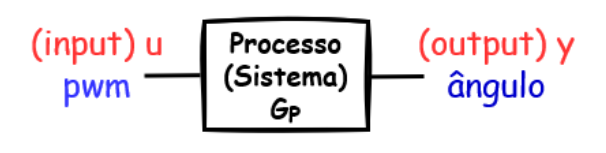

### Controlador
O controlador é um elemento que colocamos à frente das entradas da nossa instalação para atuar sobre elas de modo a garantir que a saída tenha determinadas caraterísticas.
Por exemplo, pretende-se controlar a temperatura de um edifício actuando sobre a caldeira, a velocidade do carro actuando sobre o motor ou o nível do depósito actuando sobre a bomba.
Logicamente, a entrada sobre a qual vamos atuar tem de ter uma influência sobre a saída que queremos controlar. Se eu estiver a controlar uma variável que é completamente independente do que estou a medir, não vou fazer nada!
O controlador pode ser qualquer coisa, desde uma pessoa até um sistema analógico ou um sistema digital. Nos sistemas automáticos, referimo-nos logicamente a um tipo de máquina que controla o sistema de forma autónoma, sem intervenção manual.
O controlador, representado ao lado do sistema, teria o seguinte aspeto.

Representação em diagrama de blocos: 

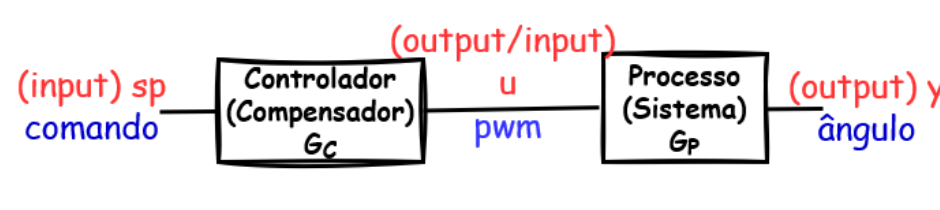

### Requisitos do sistema: que caraterísticas para a saída?
A primeira e mais óbvia é que a saída tenha um valor específico que chamaremos de `setpoint`. Por exemplo, quero que a temperatura seja 24ºC, que o carro ande a 80km/h, ou que o nível da água num reservatório seja 175m.
É claro que o ponto de ajuste não precisa de ser sempre o mesmo. Posso querer que a temperatura seja de 17ºC durante a noite e de 24ºC no resto do tempo, que o carro ande a 50km/h quando passa por uma cidade, ou querer esvaziar o reservatório até 160m porque tenho de fornecer água potável à rede.
Mas, para além do ponto de regulação, há outras caraterísticas desejadas para a saída. Em geral, vou querer que a saída tenha `estabilidade`, `convergência` para o valor do ponto de ajuste, que tenha um `tempo de resposta` rápido, ausência de `oscilações`, que não ultrapasse o valor do ponto de ajuste, etc. 
Em geral não é fácil satisfazer todos ao mesmo tempo, pelo que terei de chegar a um compromisso entre todos eles, ou a priorizar uns critérios sobre outros. Eventualmente até, caso necessário, sacrificar uns em detrimento de outros.
Por exemplo, talvez não se importe que a temperatura num edifício atinja brevemente 24,5ºC, se isso significar um tempo de resposta mais curto. Mas se por exemplo uma barragem ultrapassar algum nível crítico de água, talvez não seja tolerável exceder o ponto de regulação e prefira uma resposta lenta mas segura.
Por conseguinte, as caraterísticas desejadas para a saída dependem inteiramente do seu sistema e do que pretende fazer e, por conseguinte, do controlador que tem de utilizar.

### Controlador em malha fechada
Para que um controlador funcione, tem de ter `feedback`, o que significa basicamente que o controlador tem de ser capaz de “ver” a saída que está a tentar controlar direta ou indiretamente.
Sem feedback, um controlador não é um controlador, é mais uma “declaração de boas intenções às cegas”. Imagine que tem de conduzir um carro com os olhos fechados ...
Para controlar uma saída temos de a poder medir. Assim, comparamos a saída com o ponto de regulação para ver o erro que temos. Utilizamos este erro como entrada para o nosso controlador. 

Diagrama de blocos
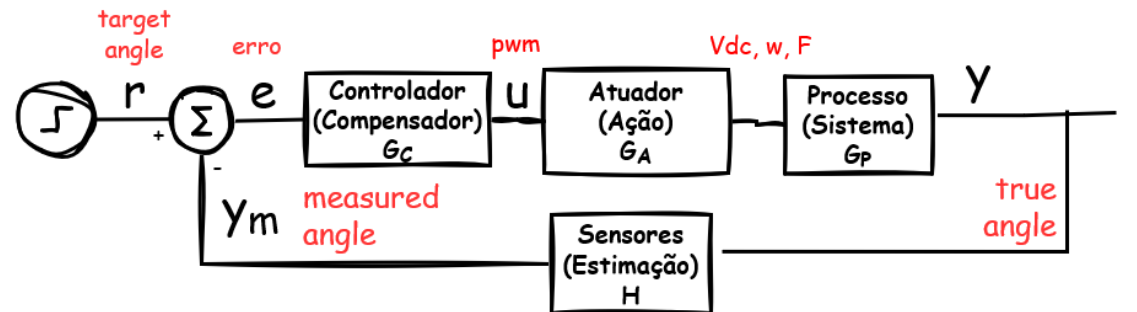

O erro entre a medição e o setpoint pode ser porque ainda não conseguimos que a saída atinja o setpoint, ou porque o setpoint mudou.
No fundo, é bastante intuitivo. Porquê tanto interesse na malha fechada com realimentação (`closed loop feedback`)? O sistema muda o seu comportamento por ter esse ramo de feedback da saída para a entrada. Podem acontecer todo o tipo de coisas muito interessantes, tanto positivas como negativas. 
Com a realimentação, o sistema global (controlador + planta) comporta-se de forma completamente diferente. A saída pode variar de uma tendência calma e obediente para o ponto de ajuste, a uma oscilação selvagem até que algo se parta.
E a diferença entre uma saída (sucesso absoluto no seu sistema de controlo) e a outra (quebra, despedimento e possível destruição do universo) depende inteiramente do controlo que conceber.

### Controlo de limiar ('bang-bang' ou 'on/off') com Arduino 

Uma necessidade comum em automação e controlo é a de executar uma determinada ação quando um valor de entrada ultrapassa um valor de referência, a que chamaremos `setpoint` ou limiar.

O controlo por meio de um limiar é uma das formas mais simples de regulação. Aparece frequentemente quando temos um atuador do tipo tudo ou nada, pelo que, não tendo a opção de modular, não é possível outro tipo de controlador mais sofisticado.

Quando a variável a controlar é independente de perturbações externas, e na ausência de feedback, podemos utilizar um único limiar como condição de ativação e desativação. Por exemplo, acender uma luz ou um alarme quando a medição de um sensor é inferior (ou superior) a um determinado valor de referência.

No entanto, quando a variável a controlar está sujeita a perturbações, ou quando existe feedback, é geralmente necessário utilizar um limiar duplo, ou seja, utilizar diferentes pontos de referência para as condições de ativação e desativação. Por exemplo, um termóstato que liga ou desliga um emissor de calor em função da temperatura registada.

A importância de usar um limiar duplo, ou `histerese`, é evitar múltiplas activações do atuador. No fundo, há duas razões para usar um duplo limiar:

- os `atrasos`: o facto de nem a medida do sensor nem a analise do valor nem a comunicação nem a ação do atuador serem imediatos

- o `ruído`, ou seja, as perturbações externas que afetam o estado do sistema, ou sensores e medidas. Por exemplo no caso da temperatura, quando o sensor atinge o limiar, a temperatura ambiente não é perfeitamente homogénea. Qualquer pequena variação no sinal provocará novamente múltiplos disparos em torno do limiar.

### Referência
https://www.luisllamas.es/en/introduction-controllers-theory-arduino/ 